In [1]:
# Auto-install missing packages (optional)
import sys
import subprocess

def install_and_import(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        __import__(package)

packages = ['pandas', 'numpy', 'seaborn', 'matplotlib', 'sklearn', 'factor_analyzer']
for pkg in packages:
    install_and_import(pkg)

In [2]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

In [3]:
# Load the dataset
file_path = "C:/Users/Aleena Mary Abraham/OneDrive/Desktop/SCMA632_2025/DATA/Survey.csv"
survey_data = pd.read_csv(file_path)

In [4]:
# Summary info
print(survey_data.info())
print(survey_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   City                                       70 non-null     object 
 1   Sex                                        70 non-null     object 
 2   Age                                        70 non-null     object 
 3   Occupation                                 70 non-null     object 
 4   Monthly Household Income                   70 non-null     object 
 5   Income                                     70 non-null     int64  
 6   Planning to Buy a new house                70 non-null     object 
 7   Time Frame                                 70 non-null     object 
 8   Reasons for buying a house                 70 non-null     object 
 9   what type of House                         70 non-null     object 
 10  Number of rooms             

In [5]:
# Select numeric columns
numerical_data = survey_data.select_dtypes(include=['int64', 'float64'])

In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [7]:
# PCA
pca = PCA()
pca_result = pca.fit(scaled_data)

In [8]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [0.32332366 0.08683237 0.07160269 0.06073222 0.05629444 0.04609823
 0.0437729  0.0396524  0.03529825 0.02731472 0.02451182 0.02392867
 0.01975551 0.01917115 0.01748088 0.01597239 0.01474926 0.01261225
 0.00966406 0.00947208 0.00718757 0.00666932 0.00626669 0.00620703
 0.00443108 0.0030697  0.00223431 0.00186911 0.00164179 0.00139072
 0.00079276]


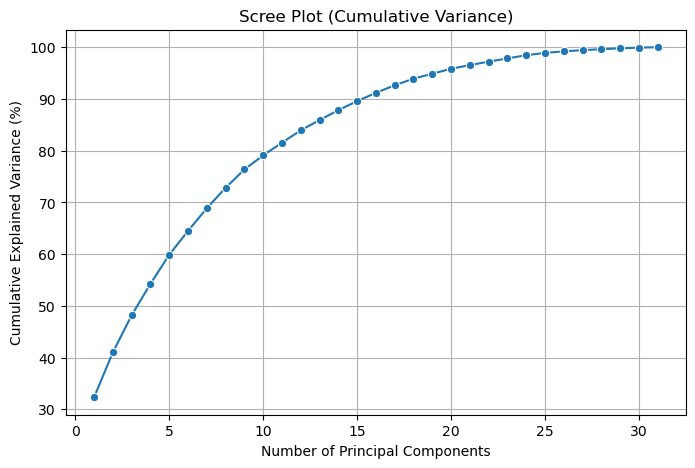

In [9]:
# Scree plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, len(explained_variance)+1), y=np.cumsum(explained_variance)*100, marker='o')
plt.title("Scree Plot (Cumulative Variance)")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid()
plt.show()

In [10]:
# PCA loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f"PC{i+1}" for i in range(len(pca.components_))],
                        index=numerical_data.columns)
print("PCA Loadings:\n", loadings)

PCA Loadings:
                                                 PC1       PC2       PC3  \
Income                                     0.278241 -0.038551 -0.085166   
1.Proximity to city                        0.160112  0.177140  0.355731   
2.Proximity to schools                     0.138364 -0.154985  0.267502   
3. Proximity to transport                 -0.017467 -0.158017 -0.193986   
4. Proximity to work place                 0.052489 -0.005493  0.529403   
5. Proximity to shopping                   0.190189  0.249792 -0.026243   
1. Gym/Pool/Sports facility                0.169757 -0.092463  0.015308   
2. Parking space                           0.184039 -0.018192  0.071225   
3.Power back-up                            0.136433  0.100723  0.257110   
4.Water supply                             0.186021 -0.189421 -0.062823   
5.Security                                 0.175165 -0.057369 -0.240506   
1. Exterior look                           0.201408  0.317646 -0.106256   
2. Unit si

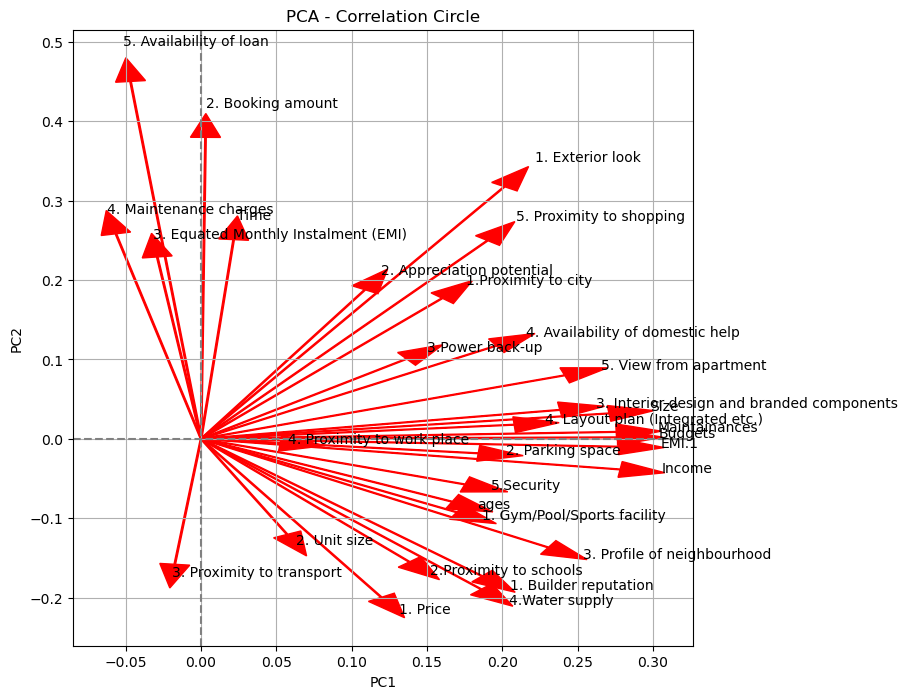

In [11]:
# Correlation circle
plt.figure(figsize=(8, 8))
for i, var in enumerate(numerical_data.columns):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              head_width=0.02, color='r')
    plt.text(loadings.iloc[i, 0]*1.1, loadings.iloc[i, 1]*1.1, var, color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Correlation Circle')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid()
plt.show()

In [12]:
# Bartlett’s test
chi_square_value, p_value = calculate_bartlett_sphericity(scaled_data)
print("Bartlett’s test: Chi-square =", chi_square_value, ", p-value =", p_value)

Bartlett’s test: Chi-square = 1562.964633118281 , p-value = 1.0805923579037055e-118


In [13]:
# KMO test
kmo_all, kmo_model = calculate_kmo(scaled_data)
print("KMO test:", kmo_model)

KMO test: 0.7154075637394491


C:\Users\Aleena Mary Abraham\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [14]:
# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(scaled_data)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [15]:
# Factor loadings
fa_loadings = pd.DataFrame(fa.loadings_, index=numerical_data.columns)
print("Factor Loadings:\n", fa_loadings)

Factor Loadings:
                                                   0         1         2  \
Income                                     0.786037  0.298507  0.297098   
1.Proximity to city                        0.246968  0.710428 -0.155440   
2.Proximity to schools                     0.171858  0.443966  0.244652   
3. Proximity to transport                 -0.067726 -0.239991  0.502273   
4. Proximity to work place                -0.192194  0.671576  0.064342   
5. Proximity to shopping                   0.579069  0.250378 -0.078065   
1. Gym/Pool/Sports facility                0.417396  0.219618  0.188419   
2. Parking space                           0.465503  0.308012  0.037276   
3.Power back-up                            0.250145  0.425960 -0.002377   
4.Water supply                             0.400107  0.151818  0.719399   
5.Security                                 0.587870 -0.053124  0.209359   
1. Exterior look                           0.732157  0.204742 -0.306296   
2. Unit

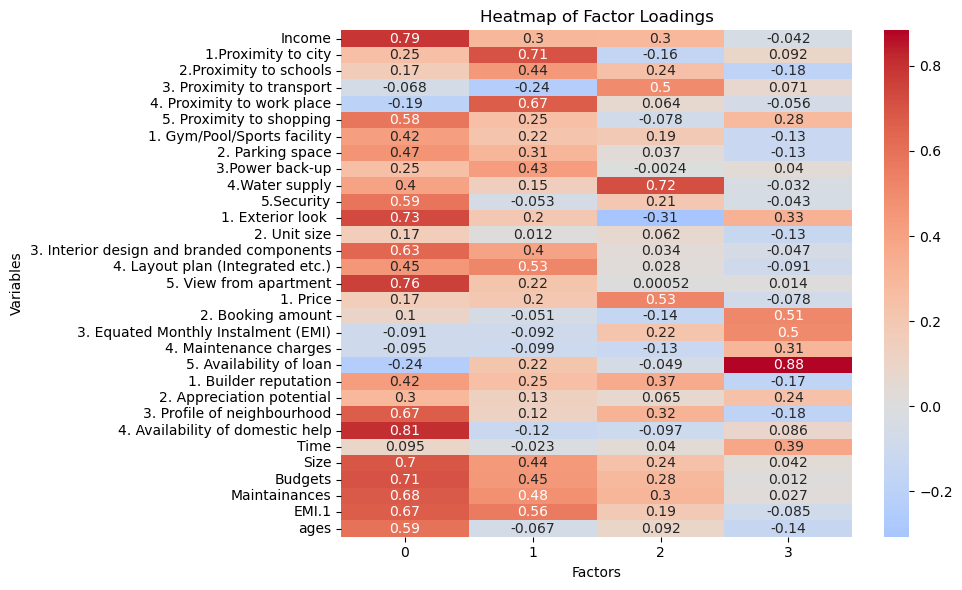

In [16]:
# Heatmap of factor loadings
plt.figure(figsize=(10, 6))
sns.heatmap(fa_loadings, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap of Factor Loadings")
plt.xlabel("Factors")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()